In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed

Original price data:
Ticker              PG
Date                  
2025-02-14  162.889999
2025-02-19  166.490005
2025-02-24  170.539993
2025-03-06  174.660004
2025-03-11  173.119995


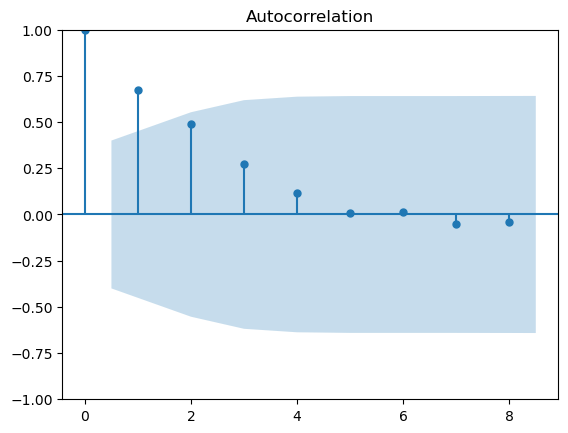

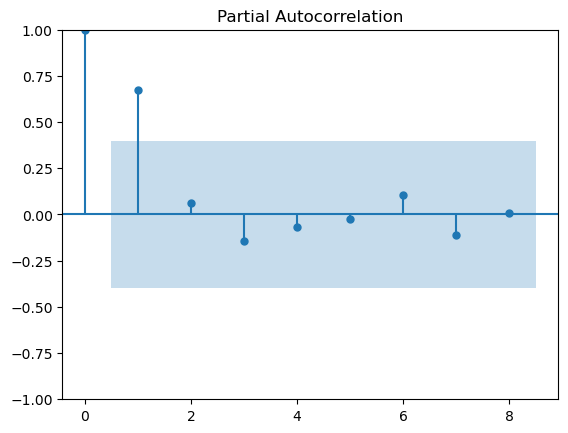


Forecasted prices for the next 5 periods:
24    155.802999
25    157.294771
26    158.460967
27    159.372642
28    160.085345
Name: predicted_mean, dtype: float64


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

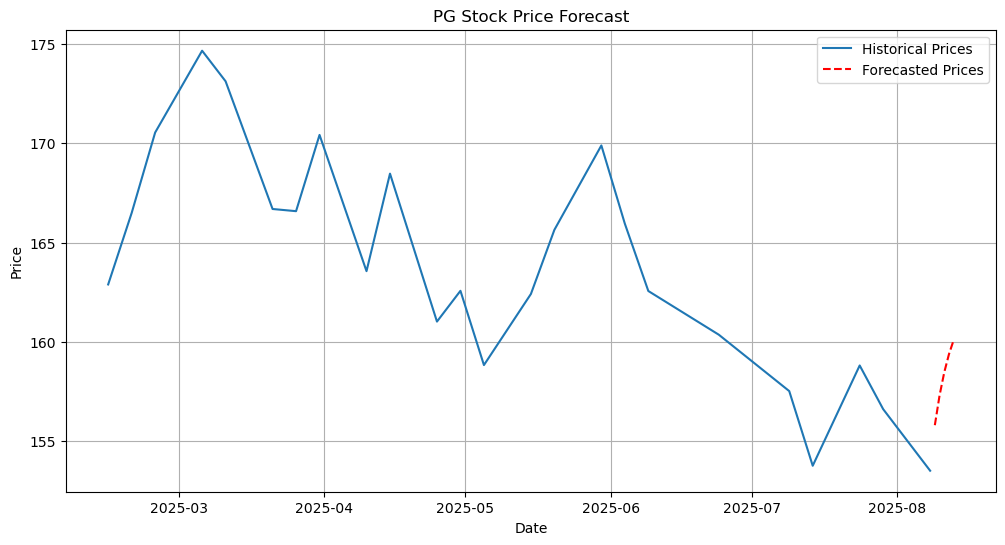


Model Summary:
                               SARIMAX Results                                
Dep. Variable:                     PG   No. Observations:                   24
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -66.674
Date:                Sun, 10 Aug 2025   AIC                            141.349
Time:                        15:23:29   BIC                            146.061
Sample:                             0   HQIC                           142.599
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.6382      3.647     44.599      0.000     155.491     169.786
ar.L1          0.7818      0.230      3.402      0.001       0.331       1.232
ma.L1         -0.0654      0.344    

In [112]:
#import yfinance and panda libraries
import yfinance as yf
import pandas as pd
#take data from Proctor & Gamble stock
symbol = "PG"
#downlaod proctor & Gamble stock dataset
data = yf.download(symbol, period="6mo", interval="5d", auto_adjust = False)

# Keep only the 'Close' price to use for predciting future prices
prices = data['Close']



#check prices column, with prices.head() to priunt headings
print("Original price data:")
print(prices.head())
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(prices, lags=8)
plot_pacf(prices, lags = 8)
plt.show()

# Fit ARIMA model directly on the price data (not differenced, we want price, not chnages in prices )
# p=5, order of the autoregressive model: AR terms, d=degree of differencing: degree of one difference, d = 0, q=0, order of the moving average: MA terms
model = ARIMA(prices, order=(1, 0, 1))
model_fit = model.fit()

# Forecast future prices (not differences)
forecast_steps = 5 #predict future stock prices for 5 future days, steps is number of days
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted prices
print("\nForecasted prices for the next", forecast_steps, "periods:")
print(forecast)
pd.concat([forecast])

# Create future dates for plotting
last_date = prices.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps+1)[1:]

# Plot historical and forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label='Historical Prices')
plt.plot(future_dates, forecast, 'r--', label='Forecasted Prices')
plt.title(f'{symbol} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# If you want to see the model summary
print("\nModel Summary:")
print(model_fit.summary())

ADF Statistic: -1.2915907257877364
p-value: 0.6330107314057044
0.6330107314057044


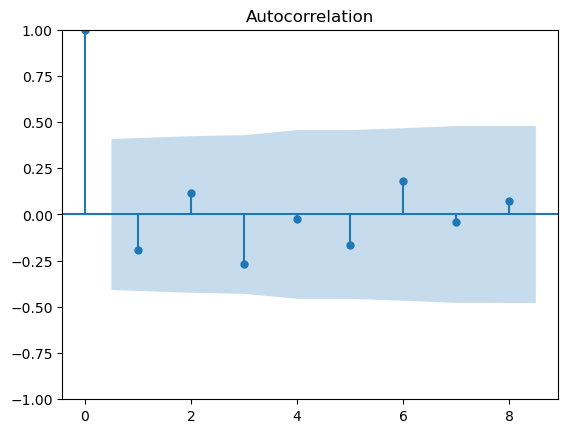

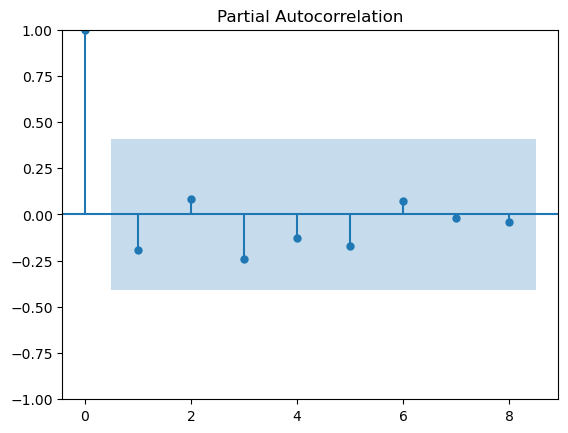

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     PG   No. Observations:                   23
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -63.156
Date:                Sun, 10 Aug 2025   AIC                            134.311
Time:                        14:03:14   BIC                            138.675
Sample:                             0   HQIC                           135.339
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.193     -5.173      0.000      -1.379      -0.621
ma.L1         -0.0025     24.479     -0.000      1.000     -47.979      47.974
ma.L2         -0.9975      0.565     -1.765      0.0

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


50    0.903920
51   -1.296945
52    0.702755
53   -1.114168
54    0.536684
Name: predicted_mean, dtype: float64


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

ARIMA(0,0,0): AIC=154.94, BIC=157.30
ARIMA(0,0,1): AIC=147.43, BIC=150.96
ARIMA(0,0,2): AIC=143.37, BIC=148.08
ARIMA(0,1,0): AIC=131.97, BIC=133.11
ARIMA(0,1,1): AIC=133.29, BIC=135.56
ARIMA(0,1,2): AIC=135.23, BIC=138.64
ARIMA(1,0,0): AIC=139.43, BIC=142.96
ARIMA(1,0,1): AIC=141.35, BIC=146.06


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored whe

ARIMA(1,0,2): AIC=142.38, BIC=148.27
ARIMA(1,1,0): AIC=133.20, BIC=135.47
ARIMA(1,1,1): AIC=134.04, BIC=137.44


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

ARIMA(1,1,2): AIC=135.99, BIC=140.53
ARIMA(2,0,0): AIC=141.31, BIC=146.02
ARIMA(2,0,1): AIC=142.10, BIC=147.99


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._

ARIMA(2,0,2): AIC=144.05, BIC=151.12
ARIMA(2,1,0): AIC=135.00, BIC=138.41
ARIMA(2,1,1): AIC=135.99, BIC=140.53
ARIMA(2,1,2): AIC=137.45, BIC=143.13
Best AIC model: ARIMA(0, 1, 0) with AIC=131.97
Best BIC model: ARIMA(0, 1, 0) with BIC=133.11


/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


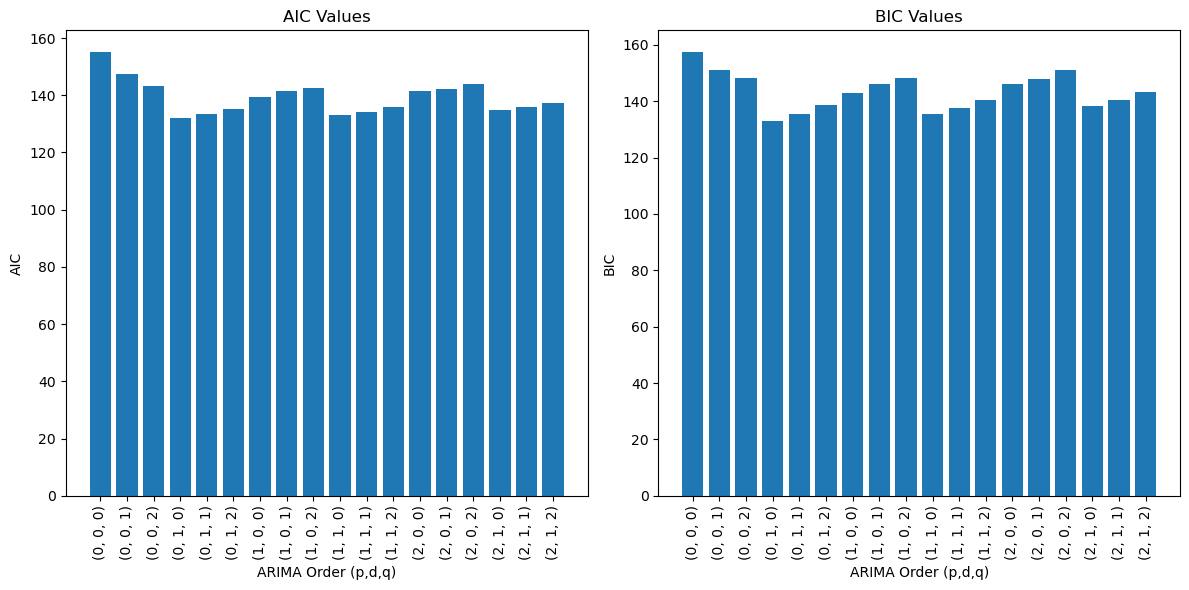

                               SARIMAX Results                                
Dep. Variable:                     PG   No. Observations:                   24
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -64.986
Date:                Sun, 10 Aug 2025   AIC                            131.971
Time:                        15:02:54   BIC                            133.107
Sample:                             0   HQIC                           132.257
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        16.6606      8.390      1.986      0.047       0.216      33.105
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.32   Pr

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
import joblib

# Assuming `model_fit` is your trained ARIMA model
joblib.dump(model_fit, "sprices3.pkl")
print("Model saved to sprices3.pkl")
